In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = False

In [4]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [5]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [8]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]

#epochs = [5] * 5

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

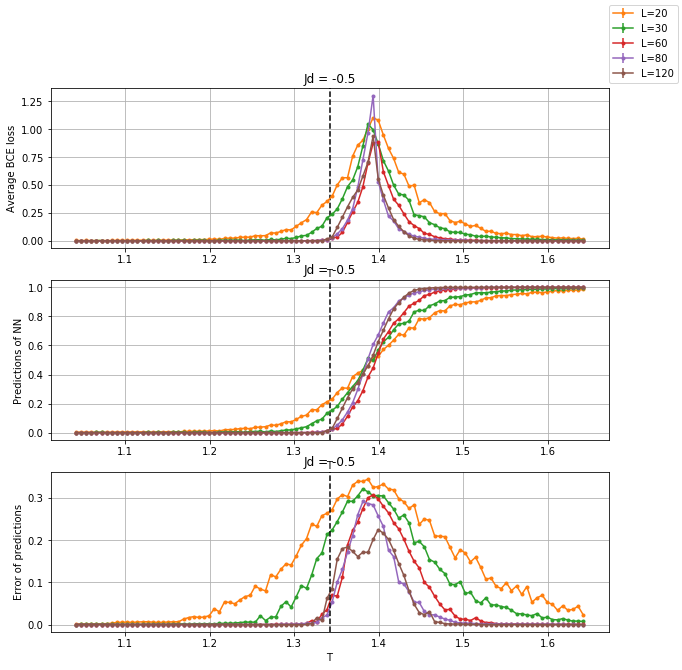

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

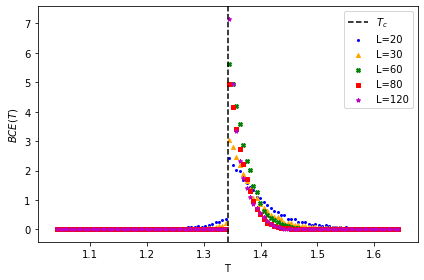

In [10]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]

markers=['.', '^', 'X', 's', '*', 'p']
colors=['blue', 'orange', 'green', 'red', 'm', 'gold']

Ls = [20, 30, 60, 80, 120]

errs_ = []
outs_ = []

for i, L in enumerate(Ls):
    num_epochs = epochs[i]
    with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

for i, L in enumerate(Ls):
    plt.scatter(T[T>0], errs(errs_[i])[T>0], marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    # ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='.', c=f'C{i+1}')


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    plt.ylabel('$BCE(T)$')
    # ax[1].set_ylabel('Predictions of NN')
    # ax[2].set_ylabel('Error of predictions')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f'Jd = {Jd}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/{Jd}_100_bce_opt_epoch.png')

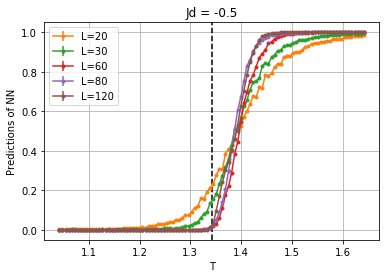

In [90]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
#ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1')
plt.plot(T, stds_err(outs_30), marker='.', c='C2')
plt.plot(T, stds_err(outs_60), marker='.', c='C3')
plt.plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')'''

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
plt.ylabel('Predictions of NN')
#plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_pred_opt_epoch.png', bbox_inches='tight')
#plt.savefig(f'images/{Jd}_100_pred_podg_epoch.png', bbox_inches='tight')

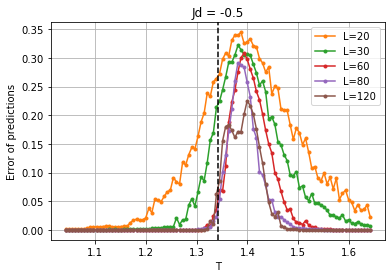

In [91]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
#ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', c='C2', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', c='C3', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', c='C4', label='L=80')
plt.plot(T, stds_err(outs_120), marker='.', c='C5', label='L=120')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

In [8]:
######## -0.3 ########

In [10]:
Jd = -0.3

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
num_epochs = 2
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = 1
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)'''

num_epochs = 1

L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

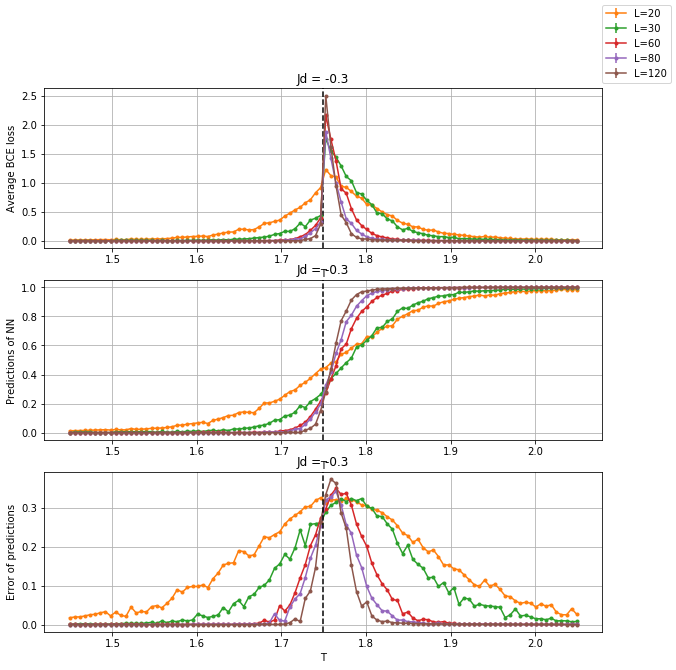

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', c='C1', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', c='C2', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', c='C3', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', c='C4', label='L=80')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', c='C5', label='L=120')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.3')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

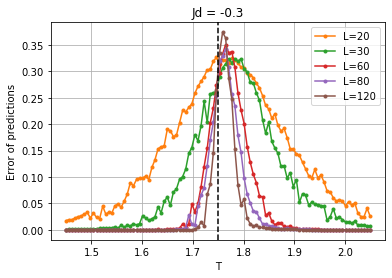

In [21]:
fig, ax = plt.subplots(1, 1)

'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')'''

#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', c='C2', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', c='C3', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', c='C4', label='L=80')
plt.plot(T, stds_err(outs_120), marker='.', c='C5', label='L=120')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig('images/03_100_err_1_epoch.png', bbox_inches='tight')

In [11]:
######## -0.5 #########

In [70]:
Jd = -0.5

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
num_epochs = 2
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = 1
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)'''

num_epochs = 1

L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

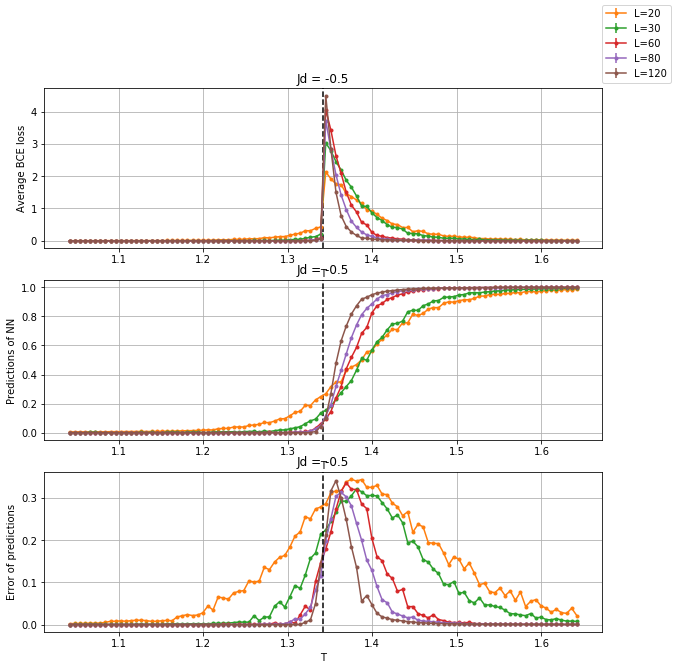

In [71]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

In [14]:
####### -0.7 ########

In [79]:
Jd = -0.7

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#L = 10
#with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
#    errs_10 = np.load(f) 
#with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
#    outs_10 = np.load(f)
    
'''L = 20
num_epochs = 4
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = 1
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = 8
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)'''

num_epochs = 27

L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

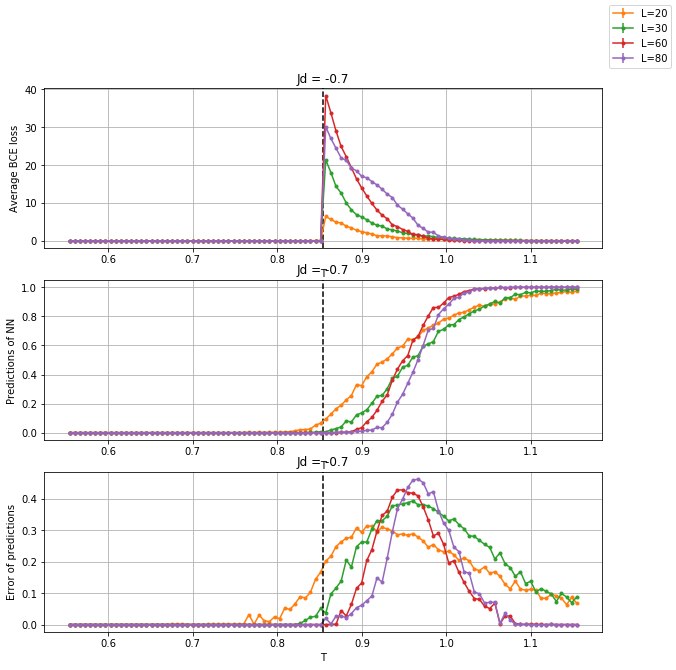

In [47]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
#ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
#ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.7')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

No handles with labels found to put in legend.


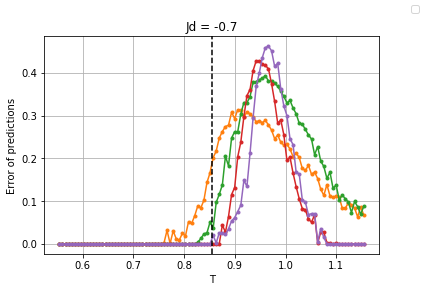

In [81]:
fig, ax = plt.subplots(1, 1)

'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
#ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
#ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1')
plt.plot(T, stds_err(outs_30), marker='.', c='C2')
plt.plot(T, stds_err(outs_60), marker='.', c='C3')
plt.plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.7')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

In [17]:
####### -0.9 ##########

In [8]:
Jd = -0.9
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#L = 10
#with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
#    errs_10 = np.load(f) 
#with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
#    outs_10 = np.load(f)
    
L = 20
num_epochs = 3
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = 1
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = 2
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = 4
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc_upd.npy', 'rb') as f:
    outs_120 = np.load(f)

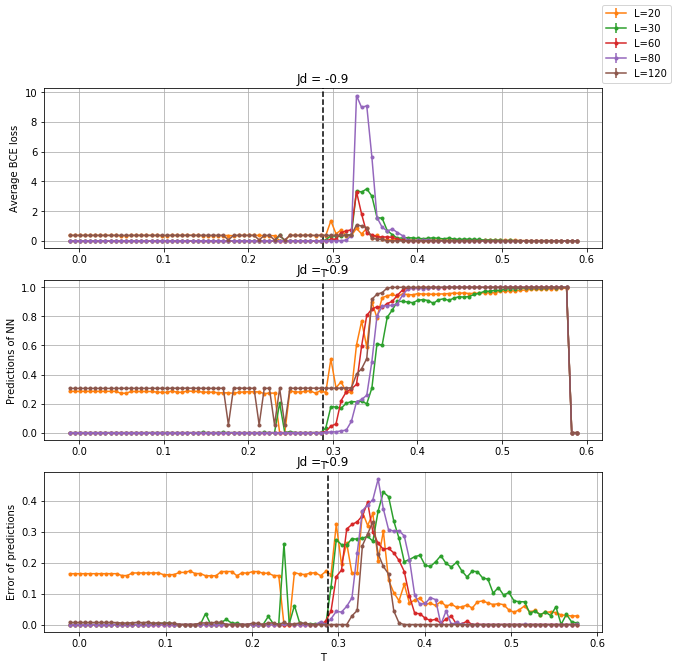

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.9')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

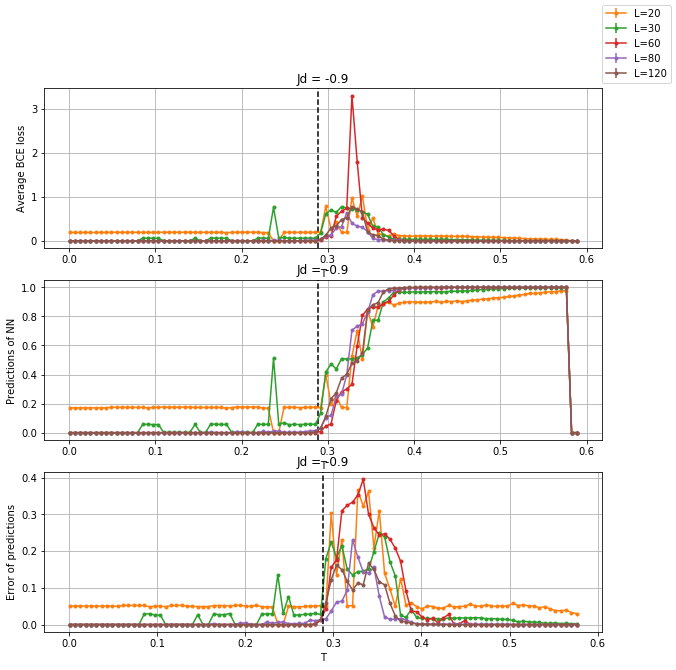

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T[T>0], errs(errs_10)[T>0], yerr=stds_err(errs_10)[T>0]/1000, marker='.', label='L=10')
ax[0].errorbar(T[T>0], errs(errs_20)[T>0], yerr=stds_err(errs_20)[T>0]/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T[T>0], errs(errs_30)[T>0], yerr=stds_err(errs_30)[T>0]/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T[T>0], errs(errs_60)[T>0], yerr=stds_err(errs_60)[T>0]/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T[T>0], errs(errs_80)[T>0], yerr=stds_err(errs_80)[T>0]/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T[T>0], errs(errs_120)[T>0], yerr=stds_err(errs_120)[T>0]/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T[T>0], errs(outs_10)[T>0], yerr=stds_err(outs_10)[T>0]/1000, marker='.')
ax[1].errorbar(T[T>0], errs(outs_20)[T>0], yerr=stds_err(outs_20)[T>0]/1000, marker='.', c='C1')
ax[1].errorbar(T[T>0], errs(outs_30)[T>0], yerr=stds_err(outs_30)[T>0]/1000, marker='.', c='C2')
ax[1].errorbar(T[T>0], errs(outs_60)[T>0], yerr=stds_err(outs_60)[T>0]/1000, marker='.', c='C3')
ax[1].errorbar(T[T>0], errs(outs_80)[T>0], yerr=stds_err(outs_80)[T>0]/1000, marker='.', c='C4')
ax[1].errorbar(T[T>0], errs(outs_120)[T>0], yerr=stds_err(outs_120)[T>0]/1000, marker='.', c='C5')

#ax[2].plot(T[T>0], stds_err(outs_10)[T>0], marker='.')
ax[2].plot(T[T>0], stds_err(outs_20)[T>0], marker='.', c='C1')
ax[2].plot(T[T>0], stds_err(outs_30)[T>0], marker='.', c='C2')
ax[2].plot(T[T>0], stds_err(outs_60)[T>0], marker='.', c='C3')
ax[2].plot(T[T>0], stds_err(outs_80)[T>0], marker='.', c='C4')
ax[2].plot(T[T>0], stds_err(outs_120)[T>0], marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.9')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

In [12]:
pred_tc={}

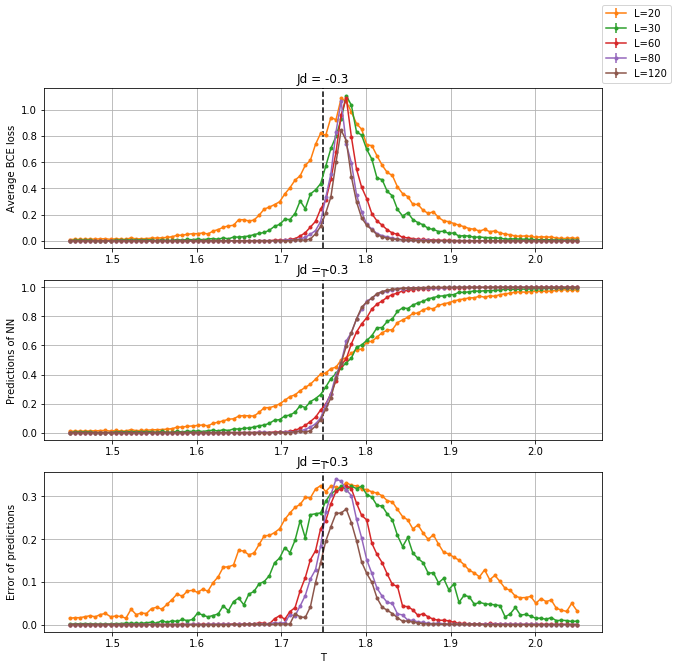

In [14]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [2, 1, 3, 3, 3]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()